In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("D:\Downloads/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [373]:
df["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

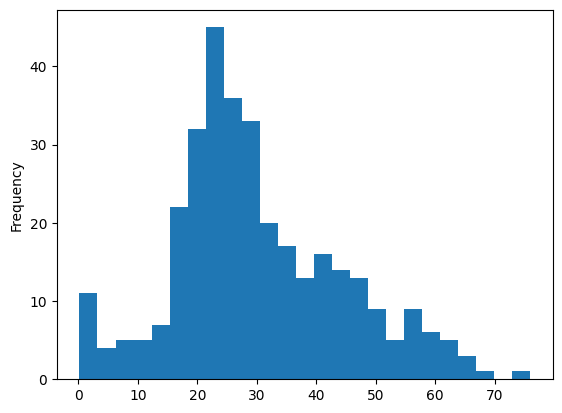

In [374]:
df["Age"].plot(kind="hist",bins=25)

<Axes: >

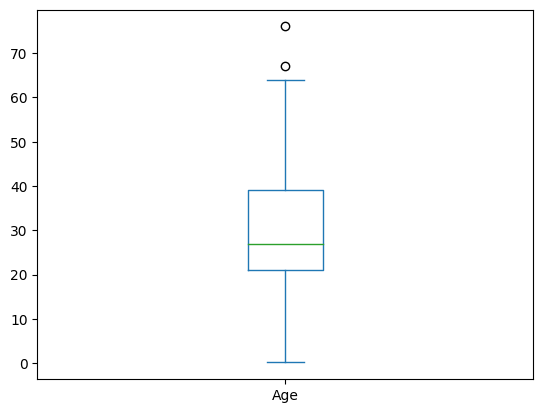

In [375]:
df['Age'].plot(kind='box')

In [376]:
df['Age'].skew()

0.4573612871503845

In [377]:
df[df['Age']>60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
13,905,0,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C
193,1085,0,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,NaN,Q
236,1128,0,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,D37,C


In [378]:
df['Age'].isnull().sum()/len(df['Age'])

0.20574162679425836

In [379]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: ylabel='count'>

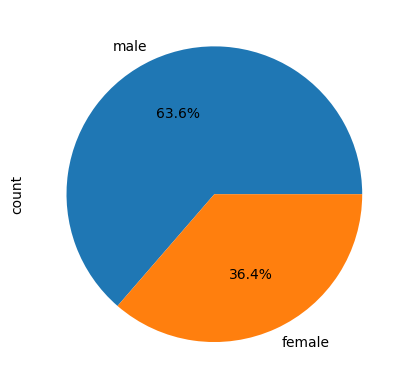

In [380]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Pclass', ylabel='Survived'>

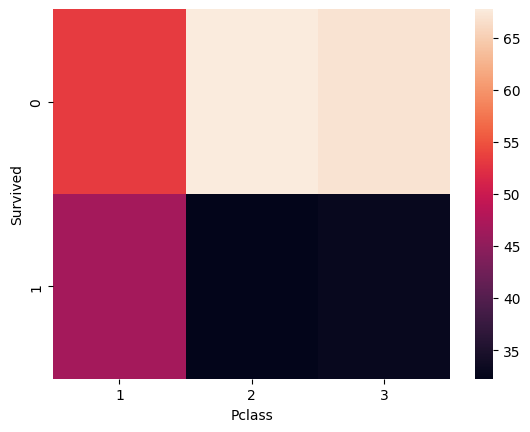

In [381]:
sb.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

<Axes: ylabel='Density'>

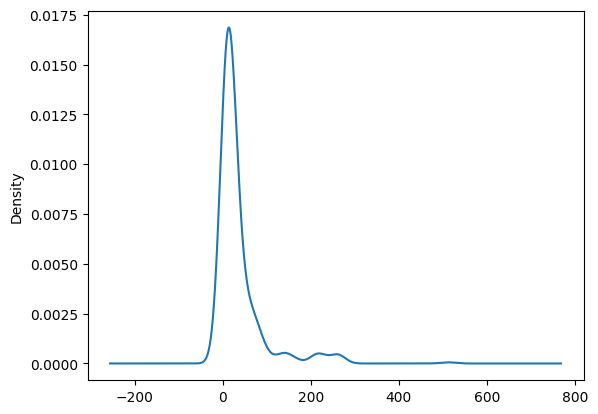

In [382]:
df['Fare'].plot(kind='kde')

In [383]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,60.784314,47.826087,67.407407
1,39.215686,52.173913,32.592593


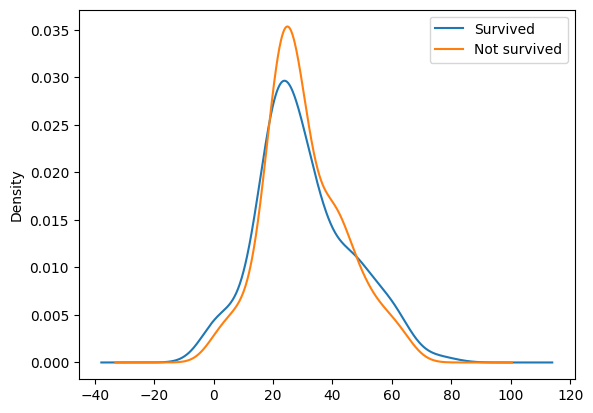

In [384]:
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Not survived')
plt.legend()
plt.show()

In [385]:
df[df['Pclass'] == 1]['Age'].mean()

40.91836734693877

In [386]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [387]:
df[df['Ticket']==	'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


In [388]:
df['individual_fare'] = df['Fare']/df['SibSp'] + df['Parch'] + 1
df[['individual_fare','Fare']].describe()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,individual_fare,Fare
count,415.00000,417.000000
mean,inf,35.627188
std,NaN,55.907576
min,4.94375,0.000000
25%,70.14165,7.895800
50%,NaN,14.454200
75%,NaN,31.500000
max,inf,512.329200


In [389]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,inf
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8.0000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,inf
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,inf
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,14.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,inf
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,inf
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,inf
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,inf


In [390]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,inf,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,inf,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,inf,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,14.2875,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,inf,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,inf,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,inf,1
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,inf,1


In [391]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def family(num):
    if(num==1):
        return "Alone"
    elif(num>2 and num<5):
        return "Small"
    else:
        return "Large"
    
df['family_size'].apply(family)

0      Alone
1      Large
2      Alone
3      Alone
4      Small
       ...  
413    Alone
414    Alone
415    Alone
416    Alone
417    Small
Name: family_size, Length: 418, dtype: object

In [392]:
df['family_size'] = df['family_size'].apply(family)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,inf,Alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8.0000,Large
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,inf,Alone
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,inf,Alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,14.2875,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,inf,Alone
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,inf,Alone
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,inf,Alone
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,inf,Alone


In [393]:
df['deck'] = df['Cabin'].str[0]
df['deck'].value_counts()

deck
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: count, dtype: int64

In [394]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,7,0,0
B,18,0,0
C,35,0,0
D,11,2,0
E,9,0,0
F,0,5,3
G,0,0,1


<Axes: xlabel='deck'>

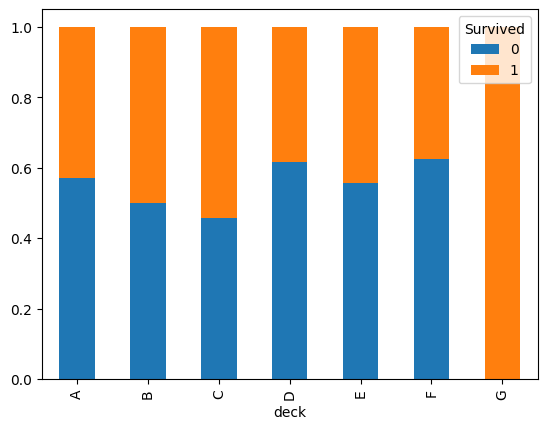

In [395]:
pd.crosstab(df['deck'],df['Survived'],normalize="index").plot(kind='bar',stacked=True)

In [396]:
df.drop('Name',axis=1,inplace=True)
df.drop('Sex',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('family_size',axis=1,inplace=True)
df.drop('deck',axis=1,inplace=True)
df.drop('Embarked',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,individual_fare
0,892,0,3,34.5,0,0,7.8292,inf
1,893,1,3,47.0,1,0,7.0000,8.0000
2,894,0,2,62.0,0,0,9.6875,inf
3,895,0,3,27.0,0,0,8.6625,inf
4,896,1,3,22.0,1,1,12.2875,14.2875
...,...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500,inf
414,1306,1,1,39.0,0,0,108.9000,inf
415,1307,0,3,38.5,0,0,7.2500,inf
416,1308,0,3,NaN,0,0,8.0500,inf


<Axes: >

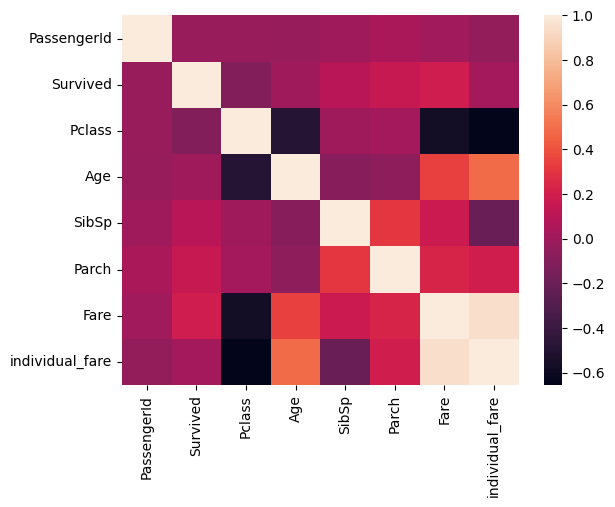

In [398]:
sb.heatmap(df.corr())

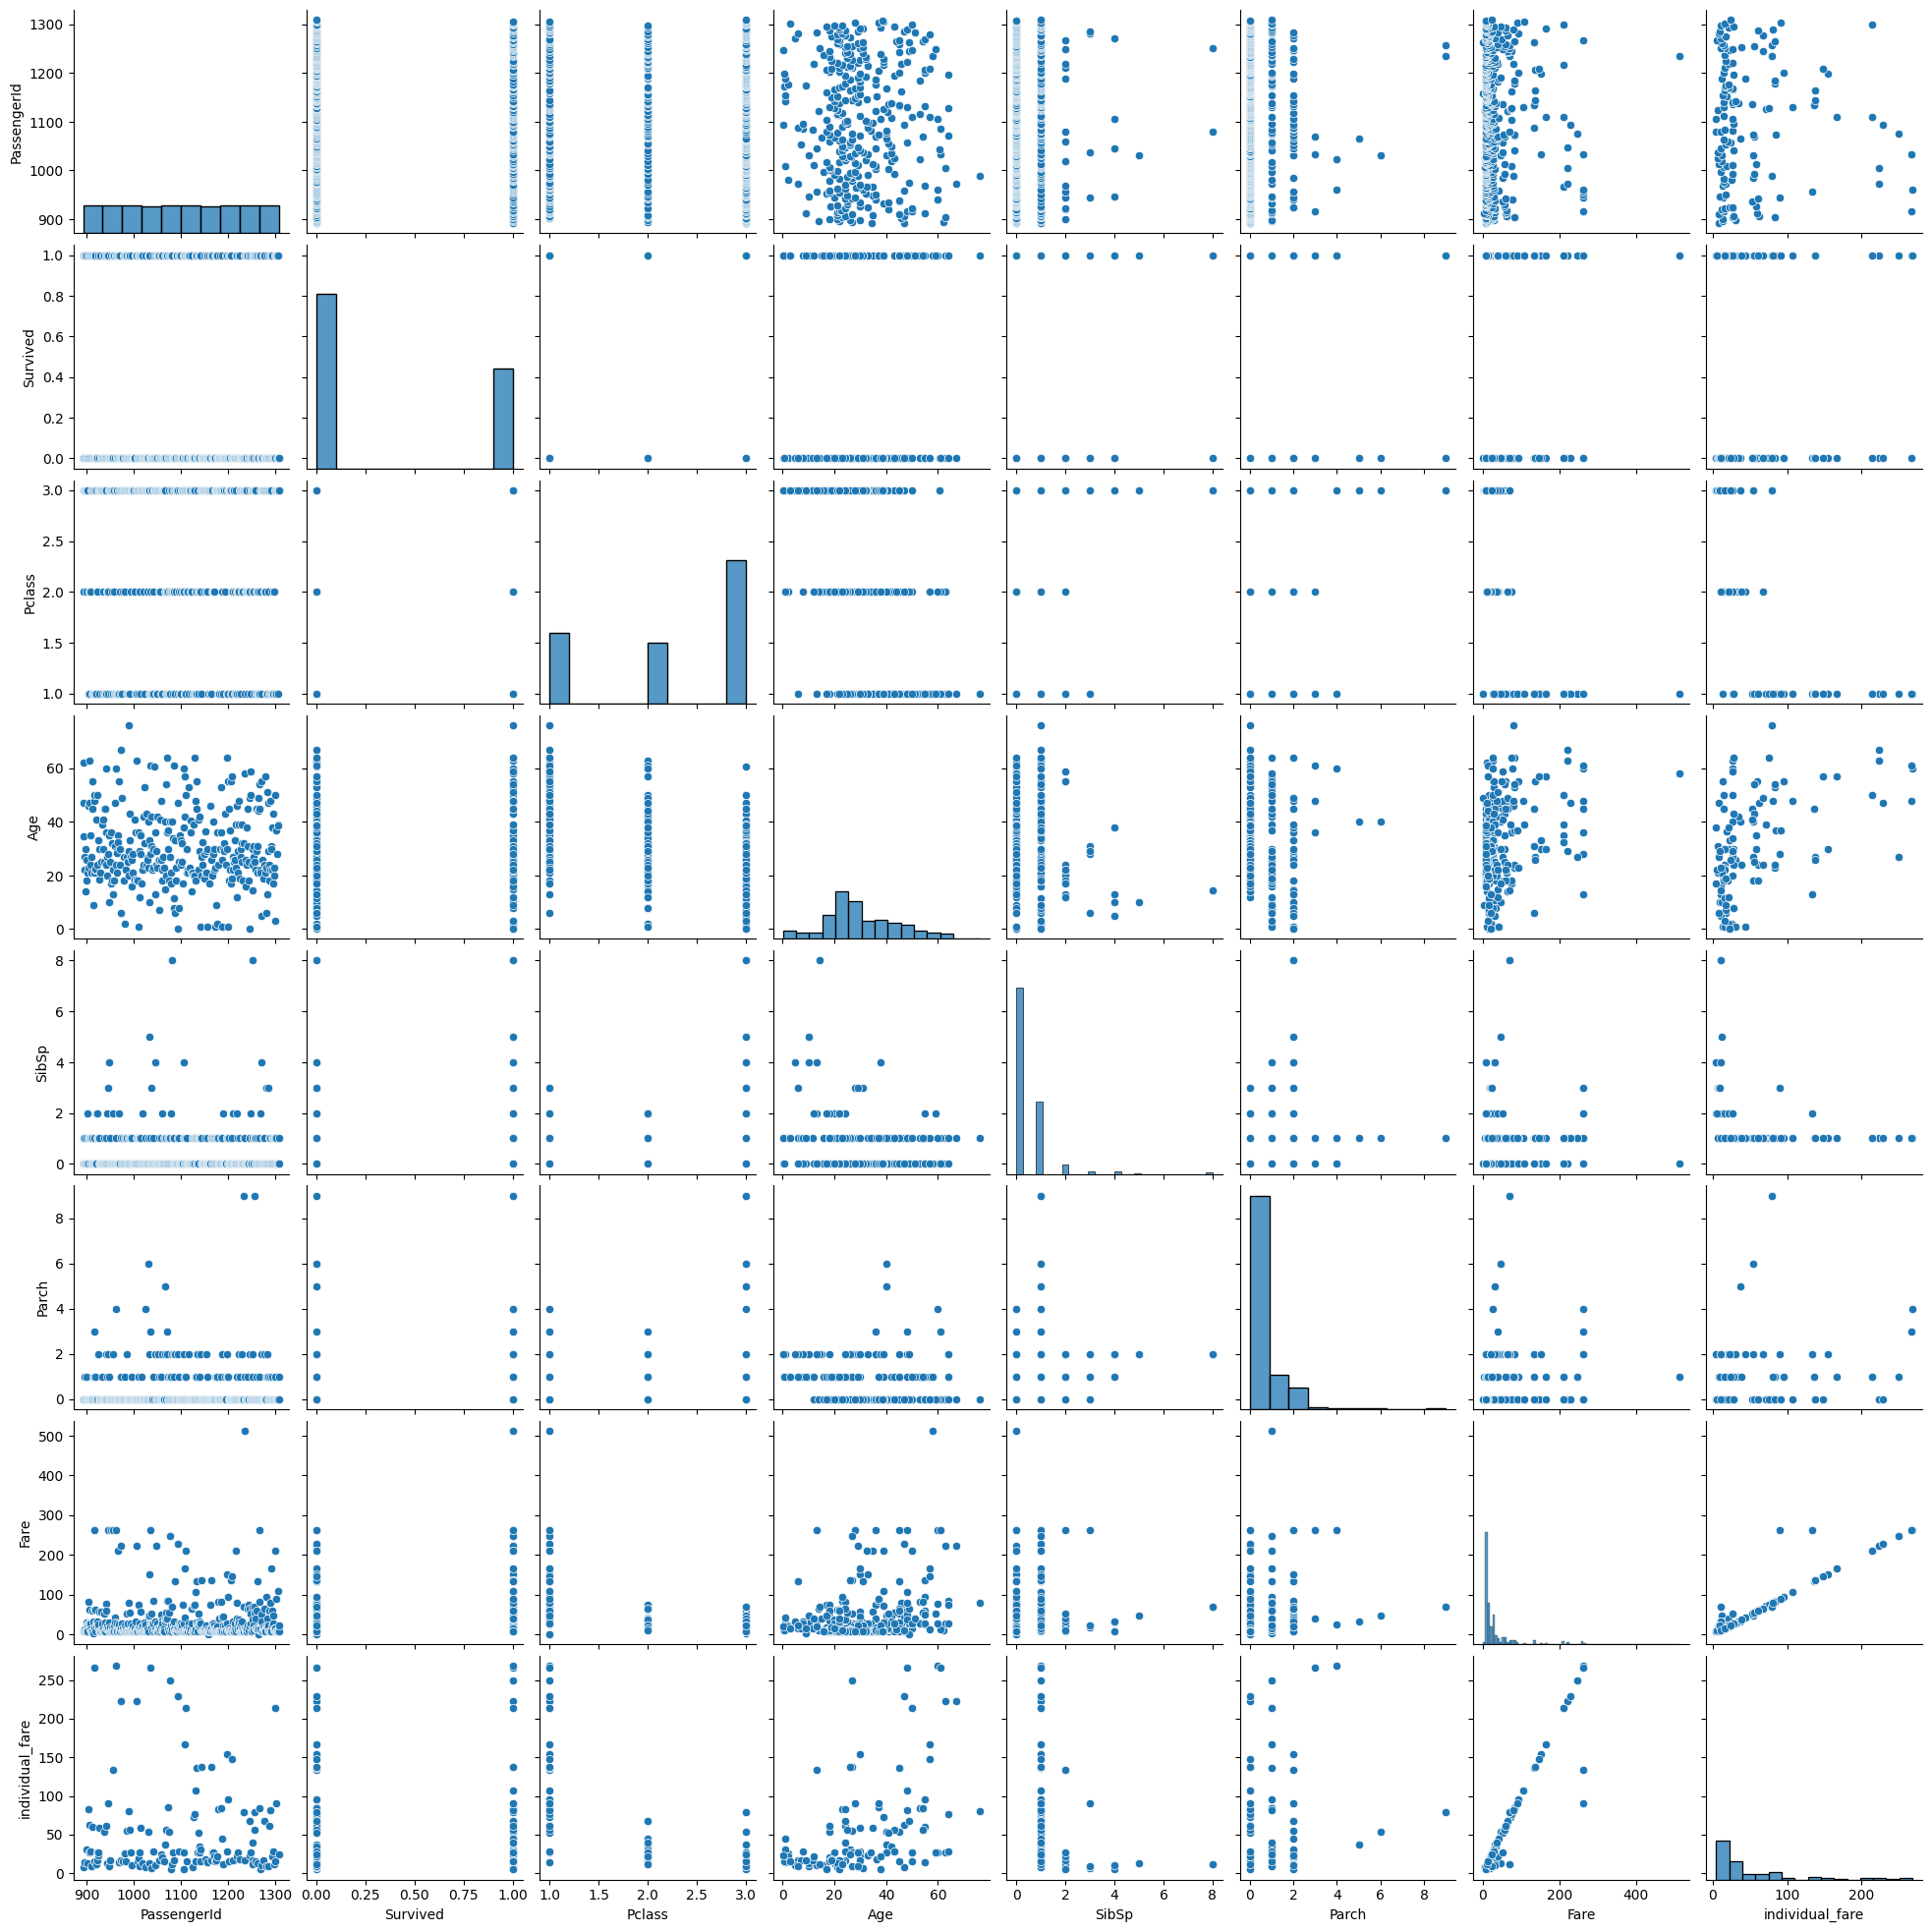

In [399]:
sb.pairplot(df)